In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.formula.api as smf


In [10]:
default = pd.read_csv('data/default.csv')
default['student_yes'] = (default['student'] == 'Yes').astype('int')
default['default_yes'] = (default['default'] == 'Yes').astype('int')

In [11]:
default.head()


,default,student,balance,income,student_yes,default_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [12]:
X = default[['balance', 'income']]
y = default['default_yes']

In [13]:
# Notice how tol must be changed to less than default value or convergence won't happen
# Use a high value of C to remove regularization
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)
model.intercept_, model.coef_

(array([-11.54046839]), array([[5.64710291e-03, 2.08089921e-05]]))

In [14]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()


Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [15]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.4594
Time:                        13:09:15   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
(model.predict(X) == y).mean()


0.9737

In [17]:
((result.predict(X) > .5) * 1 == y).mean()


0.9737

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [19]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X_train, y_train)
model.intercept_, model.coef_

(array([-11.34245982]), array([[5.61799965e-03, 1.83267722e-05]]))

In [20]:
X_train_sm = X_train.join(y_train)


In [21]:
result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.082867
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.4624
Time:                        13:12:16   Log-Likelihood:                -621.50
converged:                       True   LL-Null:                       -1156.0
Covariance Type:            nonrobust   LLR p-value:                7.123e-233
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3425      0.484    -23.420      0.000     -12.292     -10.393
balance        0.0056      0.000     22.034      0.000       0.005       0.006
income      1.833e-05    5.6e-06      3.270      0.001    7.34e-06    2.93e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
# Nearly the same as training set. So not too much over fitting has happened
(model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean()


(0.9788, 0.9788)

In [25]:
model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())


Optimization terminated successfully.
         Current function value: 0.077588
         Iterations 10
0.9716 0.9716
Optimization terminated successfully.
         Current function value: 0.075922
         Iterations 10
0.97 0.97
Optimization terminated successfully.
         Current function value: 0.077700
         Iterations 10
0.9716 0.9716


In [26]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.4594
Time:                        13:16:57   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [27]:
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
for i in range(100):
    default_sample = default.sample(len(default), replace=True)
    result_sample = smf.logit(formula='default_yes ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(result_sample.params, ignore_index=True)

In [28]:
df_params.mean(), df_params.std()


(Intercept   -11.687113
 balance       0.005707
 income        0.000022
 dtype: float64,
 Intercept    0.432953
 balance      0.000229
 income       0.000005
 dtype: float64)

In [29]:
result.params, result.bse


(Intercept   -11.540468
 balance       0.005647
 income        0.000021
 dtype: float64,
 Intercept    0.434772
 balance      0.000227
 income       0.000005
 dtype: float64)

In [30]:
weekly = pd.read_csv('data/weekly.csv')


In [31]:
weekly['Direction_Up'] = (weekly['Direction'] == 'Up').astype(int)


In [32]:
weekly.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [33]:
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction_Up']

In [34]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)

LogisticRegression(C=100000, tol=1e-07)

In [35]:
model.intercept_, model.coef_


(array([0.22122405]), array([[-0.03872222,  0.0602483 ]]))

In [36]:
# accuracy
(model.predict(X) == y).mean()

0.5555555555555556

In [37]:
# model is different but nearly identical
model.fit(X.iloc[1:], y.iloc[1:])
model.intercept_, model.coef_, (model.predict(X) == y).mean()

(array([0.22324305]), array([[-0.03843317,  0.06084763]]), 0.5564738292011019)

In [38]:
# c
# wrong prediction
model.predict([X.iloc[0]]), y[0]

c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([1]), 0)

In [39]:
# d
errors = np.zeros(len(X))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    model.fit(X[leave_out], y[leave_out])
    if model.predict([X.iloc[i]]) != y[i]:
        errors[i] = 1

c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

In [40]:
# e
errors.mean()

0.44995408631772266

In [41]:
np.random.seed(1)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [42]:
y.shape


(100,)

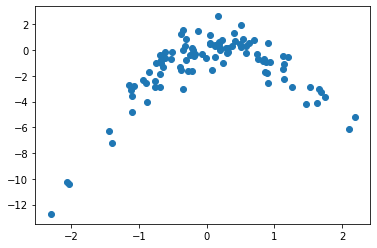

In [43]:
plt.scatter(x, y);


In [44]:
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])
df.head()

,b0,x,x2,x3,x4,y
0,1.0,1.624345,2.638498,4.285832,6.961671,-4.099779
1,1.0,-0.611756,0.374246,-0.228947,0.140060,-0.135741
2,1.0,-0.528172,0.278965,-0.147342,0.077822,-0.682611
3,1.0,-1.072969,1.151262,-1.235268,1.325403,-2.781913
4,1.0,0.865408,0.748930,0.648130,0.560897,-1.727365


In [45]:
from sklearn.linear_model import LinearRegression


In [46]:
X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature n

In [47]:
# each error here is average error for linear, quadratic, cubic and quartic model.
# Looks like it stabilizes at quadratic.
errors.mean(axis=0)

array([6.26076433, 0.91428971, 0.92687688, 0.86691169])

In [48]:
# again with different seed. 
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])


X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

# quite a different average error. But again stabilizes at quadratic which makes sense
errors.mean(axis=0)

c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature n

array([11.61020827,  1.26528394,  1.28204182,  1.31659158])

In [49]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [50]:
#a
boston['medv'].mean()

22.532806324110677

In [51]:
#b 
# standard deviation of mean
boston['medv'].std() / np.sqrt(len(boston))

0.40886114749753505

In [52]:
#c
#bootstrap standard deviation of mean
means = [boston['medv'].sample(n = len(boston), replace=True).mean() for i in range(1000)]
np.std(means)

0.3979281102426376

In [53]:
#d
se = np.std(means)
boston['medv'].mean() - 2 * se, boston['medv'].mean() + 2 * se


(21.7369501036254, 23.328662544595954)

In [54]:
import scipy.stats as st


In [55]:
st.t.interval(0.95, len(boston['medv'])-1, loc=np.mean(boston['medv']), scale=st.sem(boston['medv']))


(21.729528014578595, 23.33608463364276)

In [56]:
#e
boston['medv'].median()

21.2

In [57]:
#f
medians = [boston['medv'].sample(n = len(boston), replace=True).median() for i in range(1000)]
np.std(medians)

0.36780536972697897

In [58]:
#g
boston['medv'].quantile(.1)

12.75

In [59]:
#h
quantile_10 = [boston['medv'].sample(n = len(boston), replace=True).quantile(.1) for i in range(1000)]
np.std(quantile_10)

0.4996360575458901